# Anomaly Detection Feature Study
## 0. Prerequisites
### Data
High-level features from DelphesHerwig (background) and DelphesPythia (background, W' signal)

In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm

## 1. Loading Data

In [2]:
filenames = {
    "herwig": "GAN-data\events_anomalydetection_DelphesHerwig_qcd_features.h5",
    "pythiabg": "GAN-data\events_anomalydetection_DelphesPythia8_v2_qcd_features.h5",
    "pythiasig": "GAN-data\events_anomalydetection_DelphesPythia8_v2_Wprime_features.h5"
}

datatypes = ["herwig", "pythiabg", "pythiasig"]

features = ["px", "py", "pz", "m", "tau1", "tau2", "tau3"]

df = {}

### Sort leading vs. subleading jets by jet mass

In [3]:
def load_data(datatype):
    input_frame = pd.read_hdf(filenames[datatype])
    output_frame = input_frame.copy()
    for feature in features:
        output_frame[feature + "j1"] = (input_frame["mj1"] >= input_frame["mj2"])*input_frame[feature + "j1"] + (input_frame["mj1"] < input_frame["mj2"])*input_frame[feature + "j2"]
        output_frame[feature + "j2"] = (input_frame["mj1"] >= input_frame["mj2"])*input_frame[feature + "j2"] + (input_frame["mj1"] < input_frame["mj2"])*input_frame[feature + "j1"]
    del input_frame
    gc.collect()
    return output_frame

In [4]:
for datatype in tqdm(datatypes):
    df[datatype] = load_data(datatype)

100%|██████████| 3/3 [00:01<00:00,  1.79it/s]


In [5]:
for datatype in datatypes:
    print(datatype+":")
    print(df[datatype].info(memory_usage=True))
    print()

herwig:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 999999 entries, 0 to 999998
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pxj1    999999 non-null  float64
 1   pyj1    999999 non-null  float64
 2   pzj1    999999 non-null  float64
 3   mj1     999999 non-null  float64
 4   tau1j1  999999 non-null  float64
 5   tau2j1  999999 non-null  float64
 6   tau3j1  999999 non-null  float64
 7   pxj2    999999 non-null  float64
 8   pyj2    999999 non-null  float64
 9   pzj2    999999 non-null  float64
 10  mj2     999999 non-null  float64
 11  tau1j2  999999 non-null  float64
 12  tau2j2  999999 non-null  float64
 13  tau3j2  999999 non-null  float64
dtypes: float64(14)
memory usage: 114.4 MB
None

pythiabg:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 999999 entries, 0 to 999998
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pxj1    999999 non-nul

## 2. Plot Features
### Jet Masses

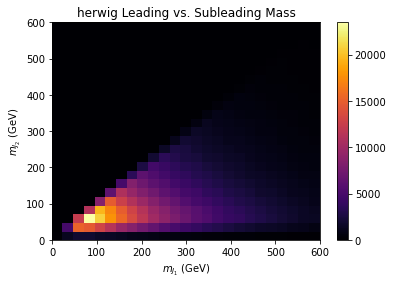

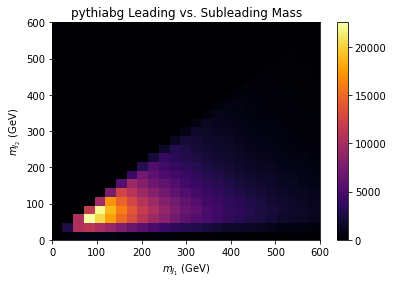

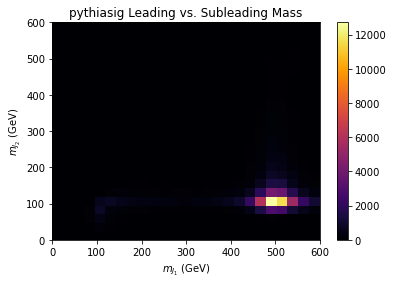

In [6]:
for datatype in datatypes:
    plt.title(datatype + " Leading vs. Subleading Mass")
    plt.ylabel("$m_{J_2}$ (GeV)")
    plt.xlabel("$m_{J_1}$ (GeV)")
    plt.hist2d(df[datatype]["mj1"], df[datatype]["mj2"], bins = 25, range = [[0,600],[0,600]], cmap = 'inferno')
    plt.colorbar()
    plt.show()

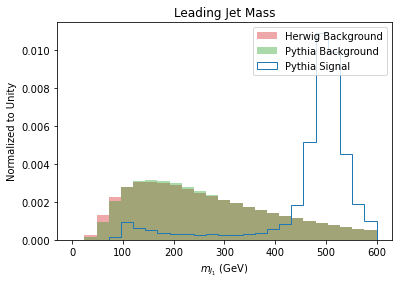

In [7]:
plt.title("Leading Jet Mass")
plt.ylabel("Normalized to Unity")
plt.xlabel("$m_{J_1}$ (GeV)")
plt.hist(df["herwig"]["mj1"], bins = 25, range = (0, 600), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["mj1"], bins = 25, range = (0, 600), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["mj1"], bins = 25, range = (0, 600), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

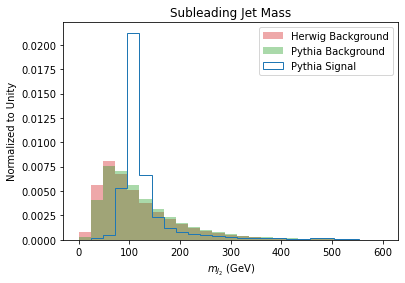

In [8]:
plt.title("Subleading Jet Mass")
plt.ylabel("Normalized to Unity")
plt.xlabel("$m_{J_2}$ (GeV)")
plt.hist(df["herwig"]["mj2"], bins = 25, range = (0, 600), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["mj2"], bins = 25, range = (0, 600), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["mj2"], bins = 25, range = (0, 600), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

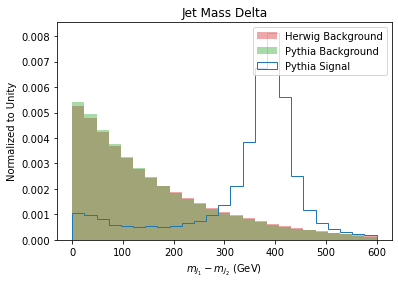

In [9]:
plt.title("Jet Mass Delta")
plt.ylabel("Normalized to Unity")
plt.xlabel("$m_{J_1}-m_{J_2}$ (GeV)")
plt.hist(df["herwig"]["mj1"] - df["herwig"]["mj2"], bins = 25, range = (0, 600), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["mj1"] - df["pythiabg"]["mj2"], bins = 25, range = (0, 600), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["mj1"] - df["pythiasig"]["mj2"], bins = 25, range = (0, 600), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

### Jet Energies

In [10]:
for datatype in datatypes:
    df[datatype]["ej1"] = np.sqrt(df[datatype]["mj1"]**2 + df[datatype]["pxj1"]**2 + df[datatype]["pyj1"]**2 + df[datatype]["pzj1"]**2)
    df[datatype]["ej2"] = np.sqrt(df[datatype]["mj2"]**2 + df[datatype]["pxj2"]**2 + df[datatype]["pyj2"]**2 + df[datatype]["pzj2"]**2)

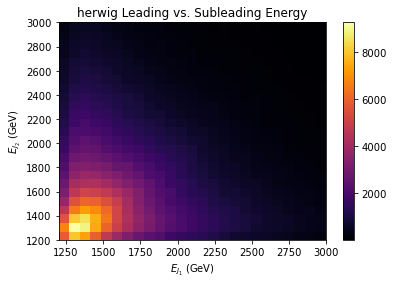

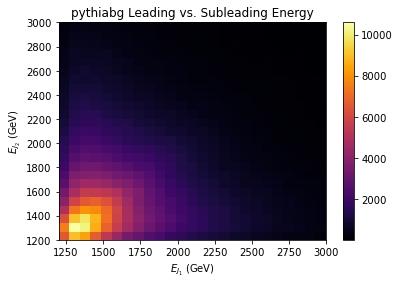

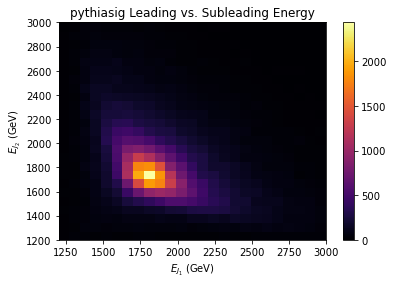

In [11]:
for datatype in datatypes:
    plt.title(datatype + " Leading vs. Subleading Energy")
    plt.ylabel("$E_{J_2}$ (GeV)")
    plt.xlabel("$E_{J_1}$ (GeV)")
    plt.hist2d(df[datatype]["ej1"], df[datatype]["ej2"], bins = 25, range = [[1200,3000],[1200,3000]], cmap = 'inferno')
    plt.colorbar()
    plt.show()

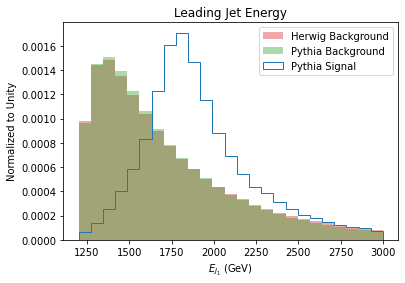

In [12]:
plt.title("Leading Jet Energy")
plt.ylabel("Normalized to Unity")
plt.xlabel("$E_{J_1}$ (GeV)")
plt.hist(df["herwig"]["ej1"], bins = 25, range = (1200, 3000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["ej1"], bins = 25, range = (1200, 3000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["ej1"], bins = 25, range = (1200, 3000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

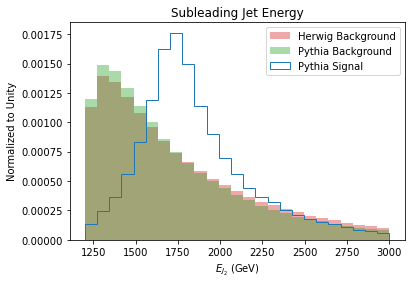

In [13]:
plt.title("Subleading Jet Energy")
plt.ylabel("Normalized to Unity")
plt.xlabel("$E_{J_2}$ (GeV)")
plt.hist(df["herwig"]["ej2"], bins = 25, range = (1200, 3000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["ej2"], bins = 25, range = (1200, 3000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["ej2"], bins = 25, range = (1200, 3000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

### Dijet Mass & Energy

In [14]:
for datatype in datatypes:
    df[datatype]["ejj"] = df[datatype]["ej1"] + df[datatype]["ej2"]
    df[datatype]["pjj"] = np.sqrt((df[datatype]["pxj1"] + df[datatype]["pxj2"])**2 + (df[datatype]["pyj1"] + df[datatype]["pyj2"])**2 + (df[datatype]["pyj1"] + df[datatype]["pyj2"])**2)
    df[datatype]["mjj"] = np.sqrt(df[datatype]["ejj"]**2 - df[datatype]["pjj"]**2)

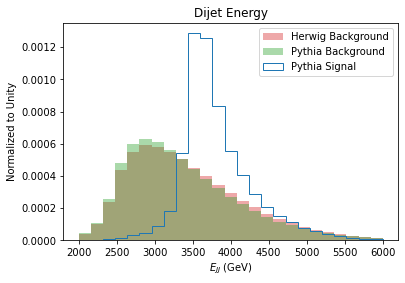

In [15]:
plt.title("Dijet Energy")
plt.ylabel("Normalized to Unity")
plt.xlabel("$E_{JJ}$ (GeV)")
plt.hist(df["herwig"]["ejj"], bins = 25, range = (2000, 6000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["ejj"], bins = 25, range = (2000, 6000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["ejj"], bins = 25, range = (2000, 6000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

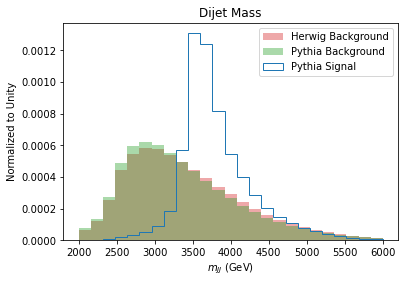

In [16]:
plt.title("Dijet Mass")
plt.ylabel("Normalized to Unity")
plt.xlabel("$m_{JJ}$ (GeV)")
plt.hist(df["herwig"]["mjj"], bins = 25, range = (2000, 6000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["mjj"], bins = 25, range = (2000, 6000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["mjj"], bins = 25, range = (2000, 6000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

### N-Subjettiness Ratio

In [17]:
for datatype in datatypes:
    df[datatype]["tau21j1"] = df[datatype]["tau2j1"] / df[datatype]["tau1j1"]
    df[datatype]["tau32j1"] = df[datatype]["tau3j1"] / df[datatype]["tau2j1"]
    df[datatype]["tau21j2"] = df[datatype]["tau2j2"] / df[datatype]["tau1j2"]
    df[datatype]["tau32j2"] = df[datatype]["tau3j2"] / df[datatype]["tau2j2"]

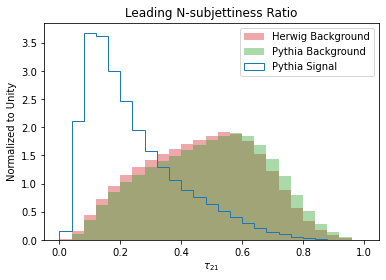

In [20]:
plt.title("Leading N-subjettiness Ratio")
plt.ylabel("Normalized to Unity")
plt.xlabel("$\\tau_{21}$")
plt.hist(df["herwig"]["tau21j1"], bins = 25, range = (0, 1), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["tau21j1"], bins = 25, range = (0, 1), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["tau21j1"], bins = 25, range = (0, 1), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

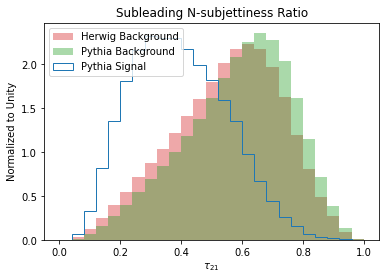

In [21]:
plt.title("Subleading N-subjettiness Ratio")
plt.ylabel("Normalized to Unity")
plt.xlabel("$\\tau_{21}$")
plt.hist(df["herwig"]["tau21j2"], bins = 25, range = (0, 1), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["tau21j2"], bins = 25, range = (0, 1), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["tau21j2"], bins = 25, range = (0, 1), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

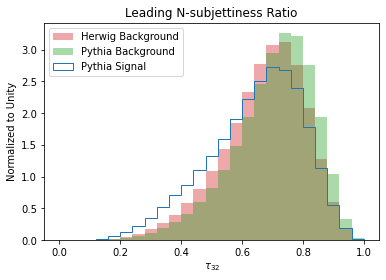

In [22]:
plt.title("Leading N-subjettiness Ratio")
plt.ylabel("Normalized to Unity")
plt.xlabel("$\\tau_{32}$")
plt.hist(df["herwig"]["tau32j1"], bins = 25, range = (0, 1), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["tau32j1"], bins = 25, range = (0, 1), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["tau32j1"], bins = 25, range = (0, 1), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

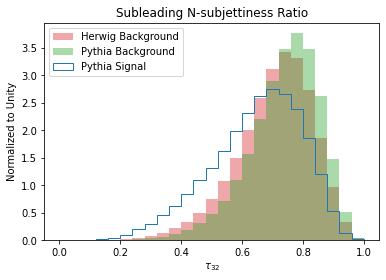

In [23]:
plt.title("Subleading N-subjettiness Ratio")
plt.ylabel("Normalized to Unity")
plt.xlabel("$\\tau_{32}$")
plt.hist(df["herwig"]["tau32j2"], bins = 25, range = (0, 1), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["tau32j2"], bins = 25, range = (0, 1), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["tau32j2"], bins = 25, range = (0, 1), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()